In [1]:
from importlib import reload
import utils; reload(utils)
from utils import *
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

Using cuDNN version 5105 on context None
Preallocating 2867/4095 Mb (0.700000) on cuda0
Mapped name None to device cuda0: GeForce GTX 650 (0000:01:00.0)
Using Theano backend.


In [2]:
%matplotlib inline
import os, random
from shutil import copytree
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

In [3]:
theano.config.dnn.conv.precision = 'float32'
print(theano.config.dnn.conv.precision)

float32


In [4]:
#for i in range(5):
#    patches1 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches1/"))
#    patches0 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches0/"))
#    try:
#        copytree(data_path + 'patches1/' + patches1, '/Volumes/Backups/data/LUNA16/patches/sample2/patches1/' + patches1)
#    except FileExistsError:
#        continue
#    try:
#        copytree(data_path + 'patches0/' + patches0, '/Volumes/Backups/data/LUNA16/patches/sample2/patches0/' + patches0)
#    except FileExistsError:
#        continue

In [5]:
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
import pandas as pd
from vgg16bn import Vgg16BN

In [6]:
model = vgg_ft_bn(2)

/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [7]:
from vgg16bn import Vgg16BN
model = vgg_ft_bn(2)


/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [8]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [9]:
model.compile(optimizer=Adam(1e-3),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [10]:
from skimage import color

In [11]:
np.sctypes

{'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'others': [bool, object, bytes, str, numpy.void],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64]}

In [12]:
np_img = np.zeros((1,224,224))

In [13]:
np_img


array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])

In [15]:
import glob2
from skimage import color
image_labels = []

ctr = 0
for filename in (os.listdir(data_path + "full/")):
    print(filename)
    for image in  glob2.glob(data_path + "full/" + filename+'/*'):
        ctr += 1
img_array = np.zeros((ctr,3,224,224),dtype=np.float32)

i=0
#for filename in glob2.glob(data_path+'sample/*/*'):
for filename in (os.listdir(data_path + "full/")):
    print(filename)
    for image in  glob2.glob(data_path + "full/" + filename+'/*'):
        if (filename == 'patches0'):
            image_labels.append(np.int16(0.0))
        else:
            image_labels.append(np.int16(1.0))
        img = color.gray2rgb(load_array(image)).astype(np.float32)
        img_array[i] = np.transpose(np.asarray(img,dtype=np.float32),(2,0,1))
        i += 1
#         print(i)
#         if i > 40:
#             break



patches0
patches1
patches0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
2

In [79]:
img_array.shape

(3358, 3, 224, 224)

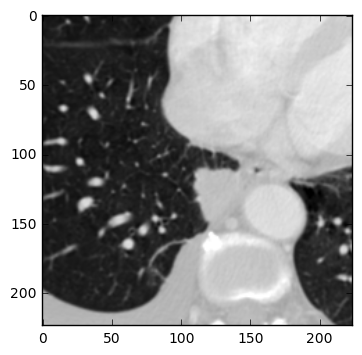

In [89]:
plt.imshow(img_array[3357][0],cmap=plt.cm.gray)

In [15]:
print(type(np_img[0][0][0]))

<class 'numpy.float32'>


In [171]:
 img_array.shape

(3358, 3, 224, 224)

In [172]:
img.shape

(224, 224, 3)

In [173]:
type(img[0][0][0])

numpy.float32

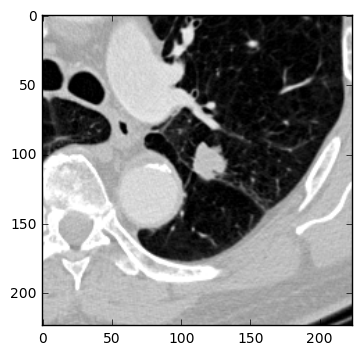

In [239]:
plt.imshow(img_array[2511][0],cmap=plt.cm.gray)

In [175]:
type(img_array[0][0][0][0])

numpy.float32

In [176]:
len(image_labels)

3358

In [177]:
type(image_labels[19])

numpy.int16

In [178]:
ohe_image_labels = to_categorical(np.array(np.float32(image_labels))).astype(np.float32)

In [193]:
sum(ohe_image_labels) # [0,1], [healthy, sick]

array([ 2007.,  1351.], dtype=float32)

In [195]:
type(ohe_image_labels[0][0])

numpy.float32

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
trn_labels, val_labels = train_test_split(ohe_image_labels, test_size=0.2, random_state=42)

In [198]:
trn,val = train_test_split(img_array, test_size=0.2, random_state=42,)

In [199]:
trn.shape

(2686, 3, 224, 224)

In [200]:
type(val[0][0][1][0])

numpy.float32

In [201]:
batch_size = 4

In [202]:
type(val[1][0][1][0])

numpy.float32

In [110]:
# model.fit(trn, 
#           trn_labels, 
#           batch_size=batch_size, 
#           nb_epoch=1, 
#           validation_data=(val, val_labels),verbose = 1)


Train on 255 samples, validate on 64 samples
Epoch 1/1
255/255 [==============================] - 40s - loss: 2.6943 - acc: 0.5176 - val_loss: 0.6939 - val_acc: 0.4844

In [111]:
# model.save_weights(data_path+'results/ft1.h5')

In [203]:
conv_layers,fc_layers = split_at(model, Convolution2D)

In [204]:
conv_layers

In [205]:
conv_model = Sequential(conv_layers)

In [206]:
%time conv_trn_feat = conv_model.predict(trn)

CPU times: user 5min 29s, sys: 4.15 s, total: 5min 33s
Wall time: 5min 37s


In [207]:
conv_trn_feat.shape

(2686, 512, 14, 14)

In [208]:
%time conv_val_feat = conv_model.predict(val)

CPU times: user 1min 23s, sys: 426 ms, total: 1min 23s
Wall time: 1min 23s


In [240]:
conv_val_feat.shape

(672, 512, 14, 14)

In [241]:
save_array(data_path+'results/conv_val_feat.dat', conv_val_feat)

In [210]:
type(conv_trn_feat[0][0][0][0])


numpy.float32

In [243]:
save_array(data_path+'results/conv_trn_feat.dat', conv_trn_feat)

## Model Training

In [244]:
conv_val_feat = load_array(data_path+'results/conv_val_feat.dat')

In [245]:
conv_val_feat.shape

(672, 512, 14, 14)

In [246]:
conv_trn_feat = load_array(data_path+'results/conv_trn_feat.dat')

In [248]:
conv_trn_feat.shape

(2686, 512, 14, 14)

In [325]:
nf=256; p=0.

In [328]:
def get_fc_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dropout(p),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(2, activation='softmax'),
    ]


In [329]:
lrg_model = Sequential(get_fc_layers())

GpuArrayException: b'out of memory'

In [ ]:
lrg_model.input_shape, lrg_model.output_shape

In [ ]:
lrg_model.summary()

In [321]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [322]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=1, 
              validation_data=(conv_val_feat, val_labels))

Train on 2686 samples, validate on 672 samples
Epoch 1/1


GpuArrayException: b'out of memory'
Apply node that caused the error: GpuElemwise{mul,no_inplace}(InplaceGpuDimShuffle{x,x}.0, GpuDot22.0)
Toposort index: 485
Inputs types: [GpuArrayType<None>(float32, (True, True)), GpuArrayType<None>(float32, (False, False))]
Inputs shapes: [(1, 1), (100352, 1024)]
Inputs strides: [(4, 4), (4096, 4)]
Inputs values: [gpuarray.array([[ 0.1]], dtype=float32), 'not shown']
Outputs clients: [[GpuElemwise{add,no_inplace}(GpuElemwise{mul,no_inplace}.0, GpuElemwise{mul,no_inplace}.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [310]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 2686 samples, validate on 672 samples
Epoch 1/3
2686/2686 [==============================] - 26s - loss: 0.6907 - acc: 0.5711 - val_loss: 0.7968 - val_acc: 0.6176

In [311]:
lrg_model.optimizer.lr = 0.0001

In [312]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
          validation_data=(conv_val_feat, val_labels))


Train on 2686 samples, validate on 672 samples
Epoch 1/3
2686/2686 [==============================] - 26s - loss: 0.6671 - acc: 0.5983 - val_loss: 0.7526 - val_acc: 0.6190

In [313]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 2686 samples, validate on 672 samples
Epoch 1/3
2686/2686 [==============================] - 26s - loss: 0.6530 - acc: 0.6214 - val_loss: 0.6912 - val_acc: 0.6220

In [ ]:
unresArr198 = load_array('/Volumes/Backups/data/unlabeled_patient_collapsed_images-198x3x224x224.bc')

In [ ]:
unlabeledPredictionvgg = lrg_model.predict(unresArr198, batch_size=8, verbose=1)

In [ ]:
#conv_feat = load_array(data_root + 'results/conv_feat.dat')
#conv_val_feat = load_array(data_root + 'results/conv_val_feat.dat')

In [165]:
theano.config.optimizer_verbose = False
print(theano.config.optimizer_verbose)

False


In [167]:
len(img_array)

3358

In [90]:
!git add cnnvggF.ipynb

In [91]:
!git commit -m "Speed up image loading for loops"

[master f31bd05] Speed up image loading for loops
 1 file changed, 4987 insertions(+), 29764 deletions(-)
 rewrite cnnvggF.ipynb (69%)


In [92]:
!git push origin master

X11 forwarding request failed on channel 0
Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 91.34 KiB | 0 bytes/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To git@github.com:ungsur/luna16.git
   04dcf05..f31bd05  master -> master
